In [15]:
pip install opencv-python

In [16]:
import cv2 as opencv
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#image = opencv.imread('C:\\Users\\MMP\\Pictures\\shubhra34kb.png')
image = opencv.imread('C:\\Users\\MMP\\Downloads\\image_with _diff_shapes.jpg')
# Display the original image in a window
opencv.imshow('Original Image', image)
# Wait until a key is pressed
opencv.waitKey(0)

# Close all OpenCV windows
opencv.destroyAllWindows()

In [18]:
# Convert the image to grayscale
gray_image = opencv.cvtColor(image, opencv.COLOR_BGR2GRAY)


In [19]:
# Apply Gaussian Blur to reduce noise
blurred_image = opencv.GaussianBlur(gray_image, (5, 5), 0)

In [20]:
# Apply Canny edge detection
edges = opencv.Canny(blurred_image, 50, 150)

In [21]:
# Find contours in the image
contours, hierarchy = opencv.findContours(edges, opencv.RETR_EXTERNAL, opencv.CHAIN_APPROX_SIMPLE)


In [22]:
# Draw all contours on the original image
contour_image = image.copy()
opencv.imshow('contour_image',contour_image)
opencv.waitKey(0)
opencv.drawContours(contour_image, contours, -1, (0, 255, 0), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [23]:
# Loop over each contour to approximate shapes
for contour in contours:
    # Approximate the contour
    epsilon = 0.02 * opencv.arcLength(contour, True)
    approx = opencv.approxPolyDP(contour, epsilon, True)

    # If the contour has 4 points, it might be a rectangle
    if len(approx) == 4:
        # Draw a rectangle around the contour
        x, y, w, h = opencv.boundingRect(approx)
        opencv.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    elif len(approx) > 4:
        # For more than 4 points, consider it a circle (approximation)
        (x, y), radius = opencv.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)   
        opencv.circle(contour_image, center, radius, (0, 0, 255), 2)

In [24]:
# Display the original image with contours and approximated shapes
opencv.imshow('Contours and Shapes', contour_image)
   
# Wait until a key is pressed to close the window
opencv.waitKey(0)
opencv.destroyAllWindows()

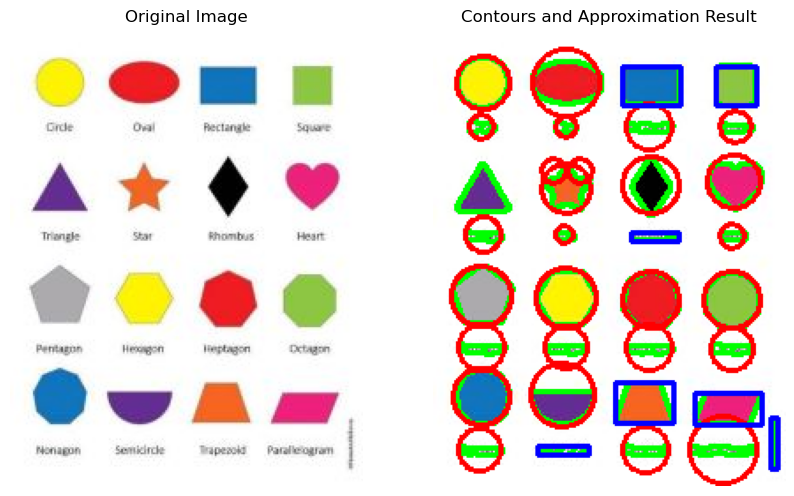

In [26]:
# Convert BGR to RGB for matplotlib display
image_rgb = opencv.cvtColor(image, opencv.COLOR_BGR2RGB)
contour_image_rgb = opencv.cvtColor(contour_image, opencv.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)  # Display in RGB format
plt.axis('off')

# Contours and Approximation Result
plt.subplot(1, 2, 2)
plt.title('Contours and Approximation Result')
plt.imshow(contour_image_rgb)  # Display in RGB format
plt.axis('off')

plt.show()